In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_curve, auc, precision_recall_curve


In [4]:
df = pd.read_csv("creditcard.csv")

print(f"Total Records: {len(df)}")
print(f"Total Features: {df.shape[1]}")

Total Records: 284807
Total Features: 31


In [5]:
print("\n📊 Missing Values:", df.isnull().sum().sum())
df.dropna(inplace=True)

print("\n📈 Dataset Sample:")
print(df.head())


📊 Missing Values: 0

📈 Dataset Sample:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206


🟢 Genuine Transactions: 284315
🔴 Fraud Transactions: 492
⚠️ Fraud Percentage: 0.17%


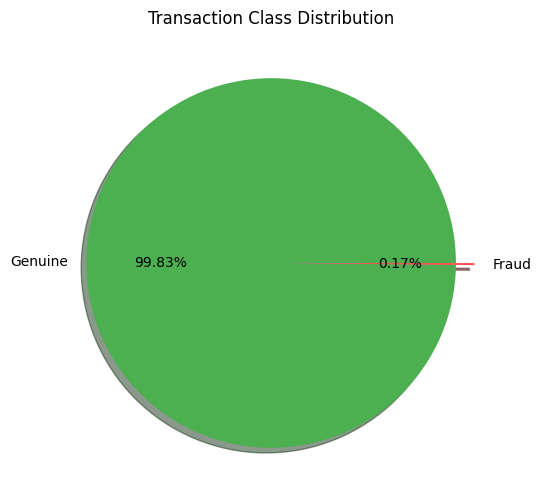

In [6]:
genuine = df[df['Class'] == 0]
fraud = df[df['Class'] == 1]

num_genuine = len(genuine)
num_fraud = len(fraud)
fraud_percentage = (num_fraud / len(df)) * 100

print(f"\n🟢 Genuine Transactions: {num_genuine}")
print(f"🔴 Fraud Transactions: {num_fraud}")
print(f"⚠️ Fraud Percentage: {fraud_percentage:.2f}%")

plt.figure(figsize=(6, 6))
plt.pie([num_genuine, num_fraud], labels=["Genuine", "Fraud"], autopct="%1.2f%%",
        colors=["#4CAF50", "#FF4C4C"], explode=(0, 0.1), shadow=True)
plt.title("Transaction Class Distribution")
plt.show()

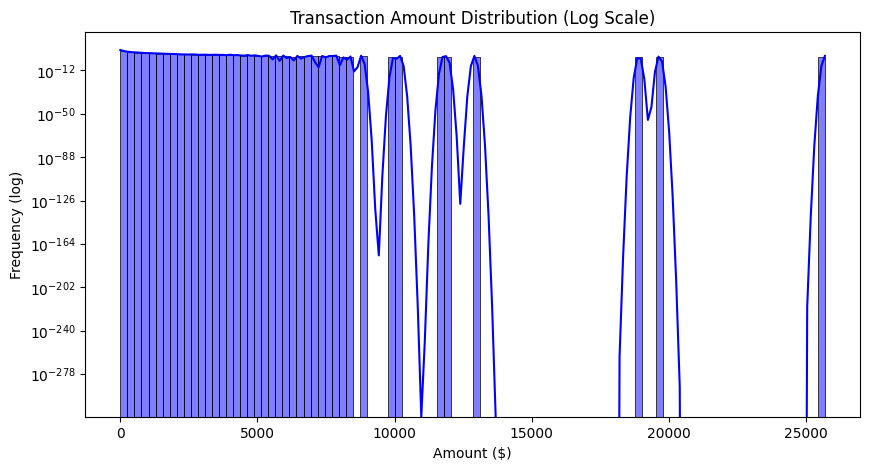

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Amount'], bins=100, color='blue', kde=True)
plt.yscale('log')  # log scale for clarity
plt.title("Transaction Amount Distribution (Log Scale)")
plt.xlabel("Amount ($)")
plt.ylabel("Frequency (log)")
plt.show()

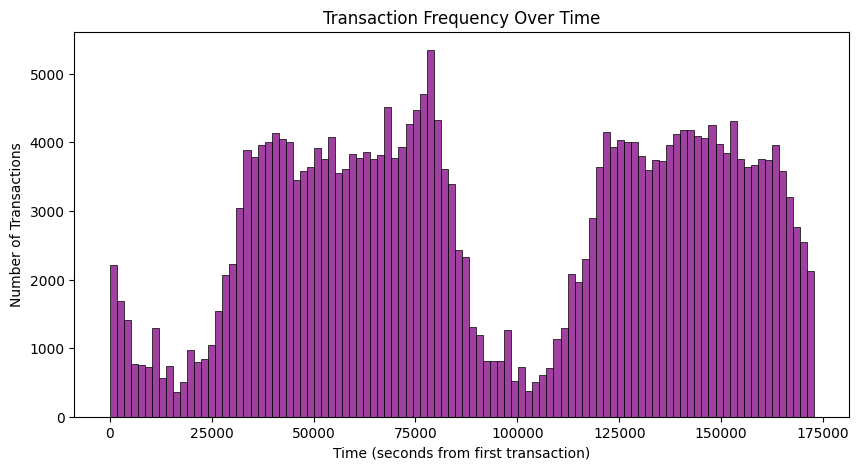

In [8]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Time'], bins=100, color='purple')
plt.title("Transaction Frequency Over Time")
plt.xlabel("Time (seconds from first transaction)")
plt.ylabel("Number of Transactions")
plt.show()

C:\Users\asbi1\AppData\Local\Temp\ipykernel_16060\1192070506.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Class', y='Amount', data=df, palette=["green", "red"])


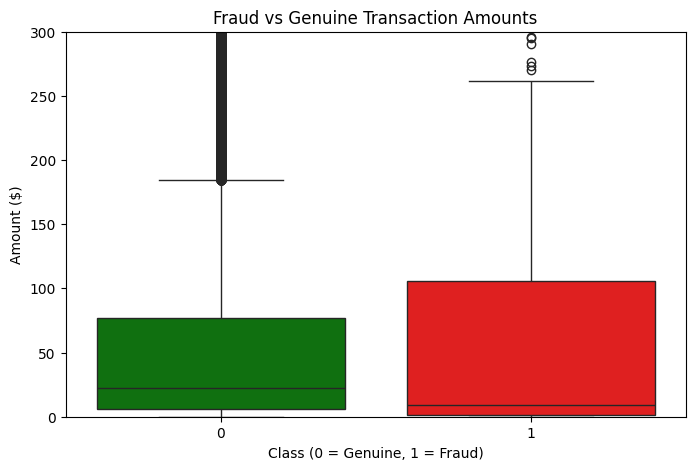

In [9]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='Class', y='Amount', data=df, palette=["green", "red"])
plt.ylim(0, 300)  # limit for clarity
plt.title("Fraud vs Genuine Transaction Amounts")
plt.xlabel("Class (0 = Genuine, 1 = Fraud)")
plt.ylabel("Amount ($)")
plt.show()

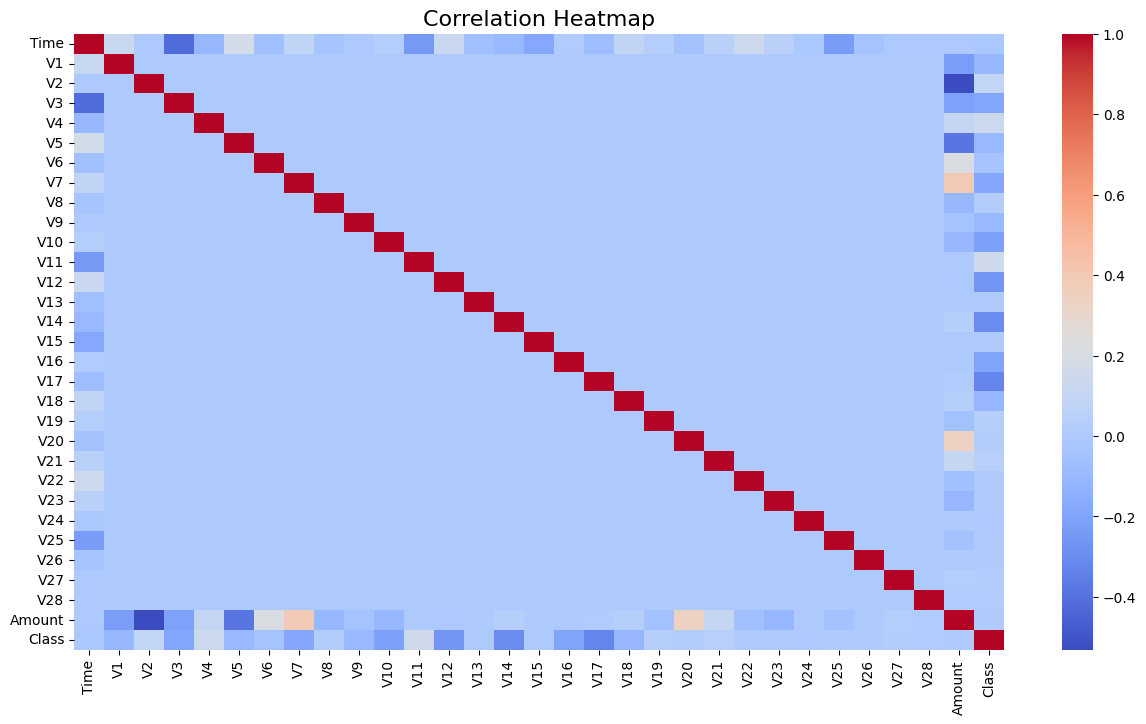

In [10]:
plt.figure(figsize=(15, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap", fontsize=16)
plt.show()


In [11]:
scaler = StandardScaler()
df['NormalizedAmount'] = scaler.fit_transform(df[['Amount']])

In [12]:
X = df.drop(['Class'], axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [13]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

rf_pred = rf_model.predict(X_test)
rf_probs = rf_model.predict_proba(X_test)[:, 1]



🎯 Accuracy: 99.96%

📊 Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.95      0.78      0.85       136

    accuracy                           1.00     85443
   macro avg       0.97      0.89      0.93     85443
weighted avg       1.00      1.00      1.00     85443



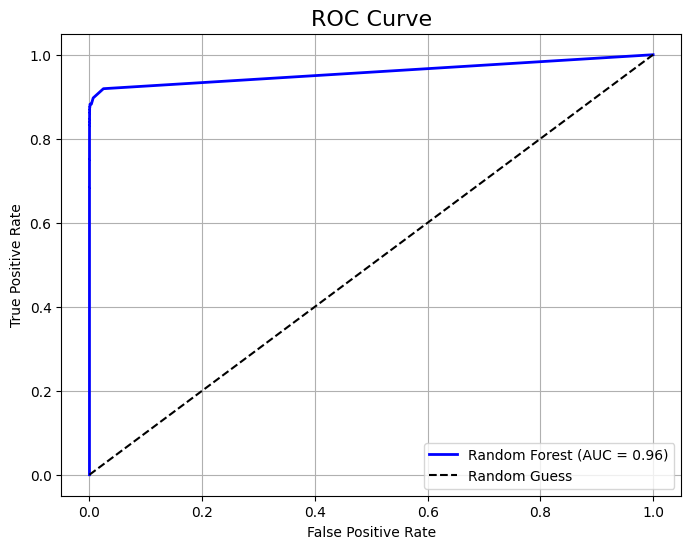

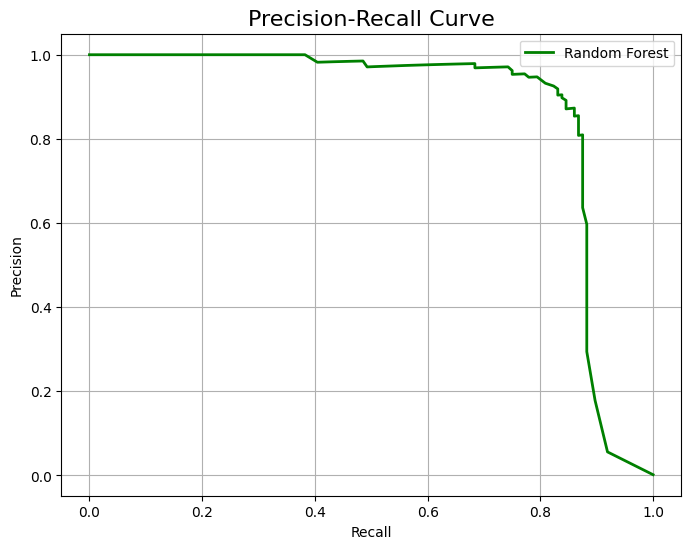

In [14]:
print(f"\n🎯 Accuracy: {rf_model.score(X_test, y_test)*100:.2f}%")
print("\n📊 Classification Report:")
print(classification_report(y_test, rf_pred))

# ROC Curve
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = auc(rf_fpr, rf_tpr)

plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label=f"Random Forest (AUC = {rf_auc:.2f})", color="blue", linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess")
plt.title("ROC Curve", fontsize=16)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)
plt.figure(figsize=(8, 6))
plt.plot(rf_recall, rf_precision, label="Random Forest", color="green", linewidth=2)
plt.title("Precision-Recall Curve", fontsize=16)
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.show()

C:\Users\asbi1\AppData\Local\Temp\ipykernel_16060\3206264196.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances[:10], y=importances.index[:10], palette="Blues_r")


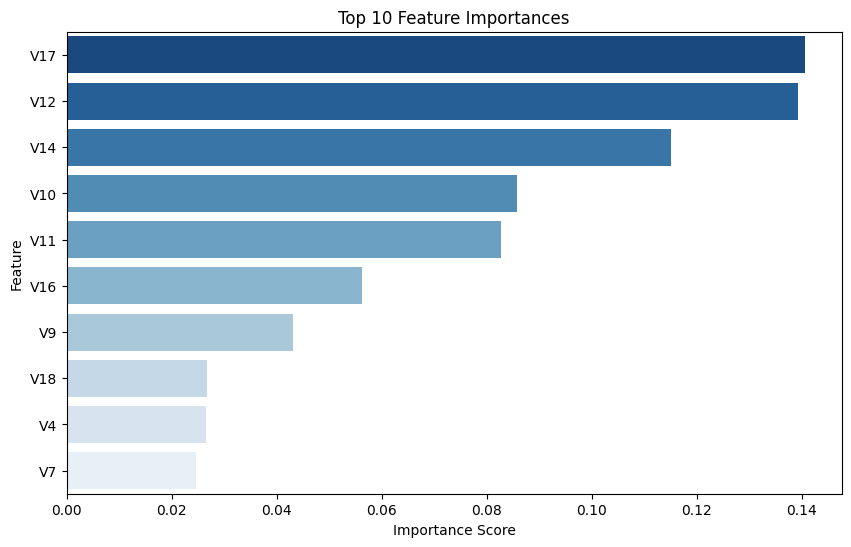

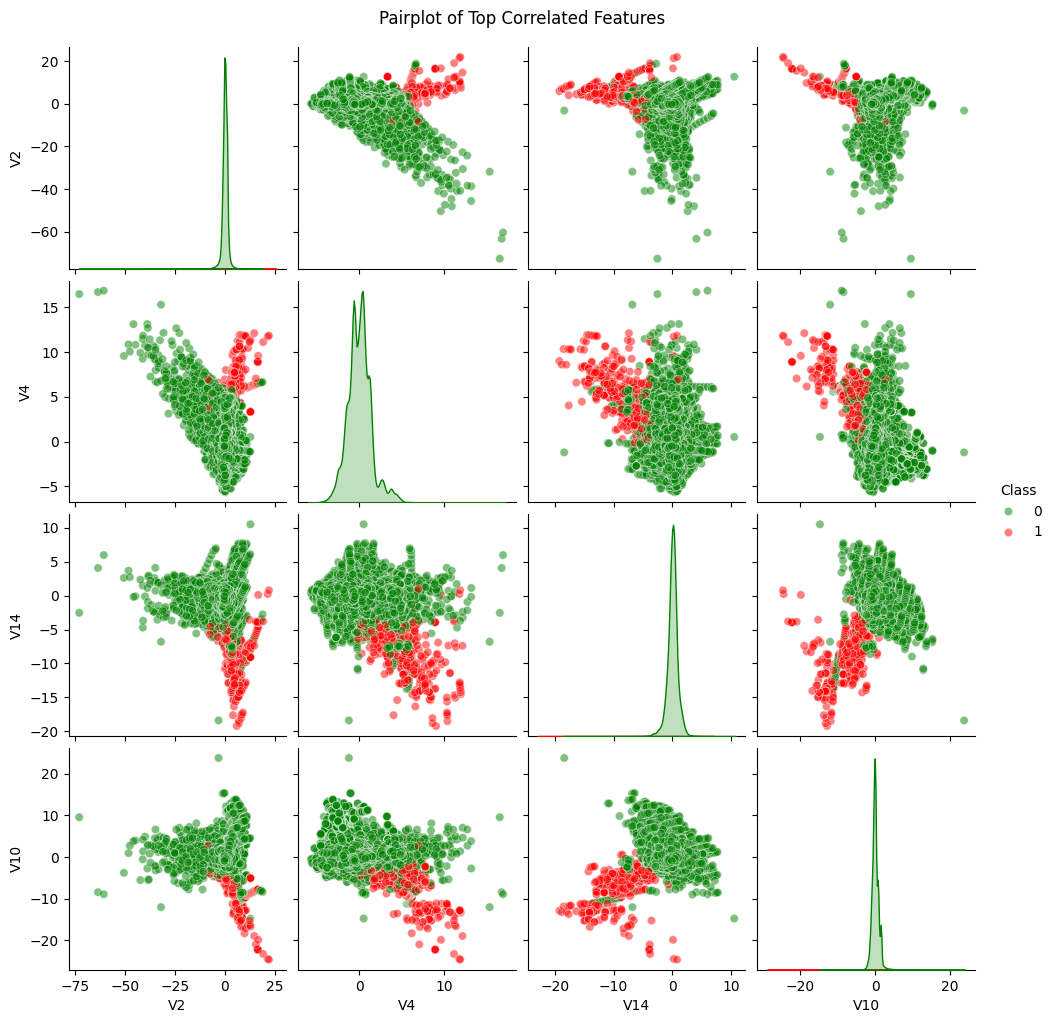

In [15]:
importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances[:10], y=importances.index[:10], palette="Blues_r")
plt.title("Top 10 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

top_features = ['V2', 'V4', 'V14', 'V10', 'Class']
sns.pairplot(df[top_features], hue='Class', palette=["green", "red"], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()